In [1]:
#Practica calificada4 ej2

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer,load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris=load_iris()

In [17]:
X_entrenamiento,X_test,y_entrenamiento,y_test=train_test_split(iris.data,iris.target)

In [18]:
arbol=DecisionTreeClassifier(max_depth=3)

In [19]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
#Aqui mostramos el r2
arbol.score(X_test,y_test)

0.9473684210526315

In [21]:
arbol.score(X_entrenamiento,y_entrenamiento)

0.9732142857142857

In [22]:
export_graphviz(arbol,out_file='arbol.dot',class_names=iris.target_names,
               feature_names=iris.feature_names,impurity=False,filled=True)

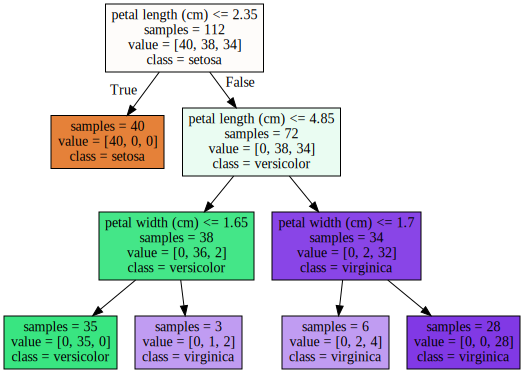

In [23]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

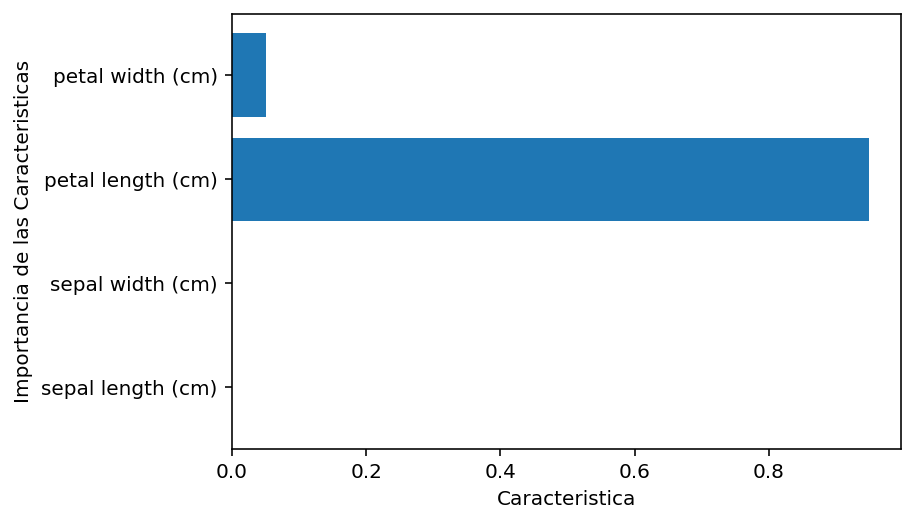

In [24]:
caract = iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.ylabel("Importancia de las Caracteristicas")
plt.xlabel("Caracteristica")
plt.show()

In [12]:
arbol=DecisionTreeClassifier(max_depth=3)

In [13]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
arbol.score(X_test,y_test)

0.9210526315789473

In [15]:
arbol.score(X_entrenamiento,y_entrenamiento)

0.9910714285714286

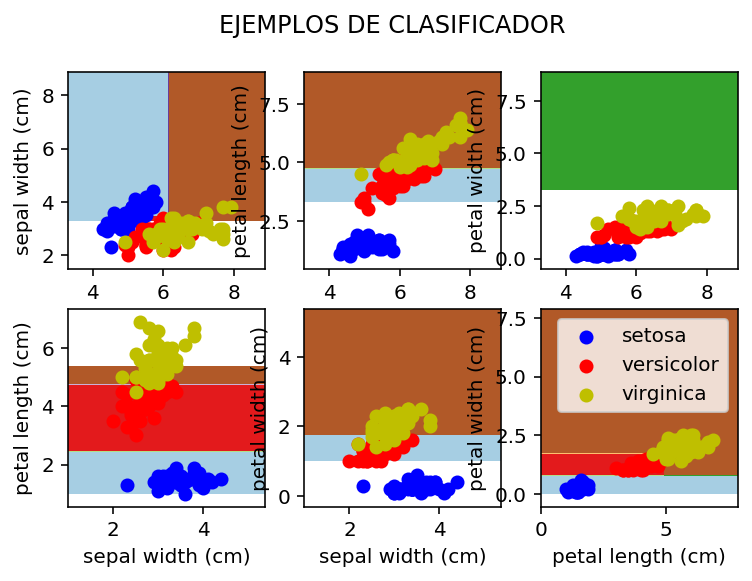

In [16]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    x=iris.data[:,pair]
    y=iris.target

    #Entrenaremos el algoritmo
    clf = DecisionTreeClassifier(max_depth=3).fit(x,y)

    plt.subplot(2,3,pairidx + 1)

    x_min, x_max = x[:, 0].min() -1, x[:, 0].max() + 1
    y_min, y_max = x[:, 0].min() -1, x[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    #Se entrenan los puntos
    for i,color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i )
        plt.scatter(x[idx, 0], x[idx, 1], c=color, label=iris.target_names[i],
                   cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("EJEMPLOS DE CLASIFICADOR")
plt.legend()
plt.show()
